# US Total Person Income Analysis
## Part 1: Descriptive Analysis

Descriptive analysis of the Us Total Person Income data set:
- Missing values
- Target (income range) analysis
- Univariate feature analysis

## Imports

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import sys
import missingno as msno
from os import path

In [14]:
from importlib import reload
sys.path.append(path.join('scripts'))
import utils, plot_utils
reload(utils)
reload(plot_utils)

<module 'plot_utils' from 'scripts/plot_utils.py'>

In [15]:
# import usefull functions from utils.py
sys.path.append(path.join("scripts"))
from utils import import_data
from plot_utils import (
    get_quantile_val,
    plot_weigthed_histogram,
    under_fifty_prop_per_value,
    barplot_share_per_modality,
    repartition_under_over_per_category,
)


## Import data and columns' names of the dataset

In [16]:
# column information
file = open(path.join("data", "infos_columns.json"), "r")
contents = file.read()
dict_infos_columns = ast.literal_eval(contents)

In [17]:
# train and test sets
data_train = import_data(
    path.join("data", "census_income_learn.csv"), dict_infos_columns
)
data_test = import_data(path.join("data", "census_income_test.csv"), dict_infos_columns)

In [18]:
# Sample size
print(
    f"Training sample population size: {np.round((data_train['instance_weight'].sum())/ 10**6, 2)} M persons,",
    f"training set shape: {data_train.shape[0]} rows",
)
print(
    f"Test sample population size: {np.round((data_test['instance_weight'].sum())/ 10**6, 2)} M persons,",
    f"test set shape: {data_test.shape[0]} rows",
)


Training sample population size: 347.25 M persons, training set shape: 199523 rows
Test sample population size: 173.54 M persons, test set shape: 99762 rows


## Missing values

In [19]:
missing_values_mapping = ['Not identifiable', 'NA', 'Do not know', ' ?', '?']

In [20]:
# replace missing values by np.nan
data_train = data_train.replace(missing_values_mapping, np.nan)
data_test = data_test.replace(missing_values_mapping, np.nan)

<AxesSubplot:>

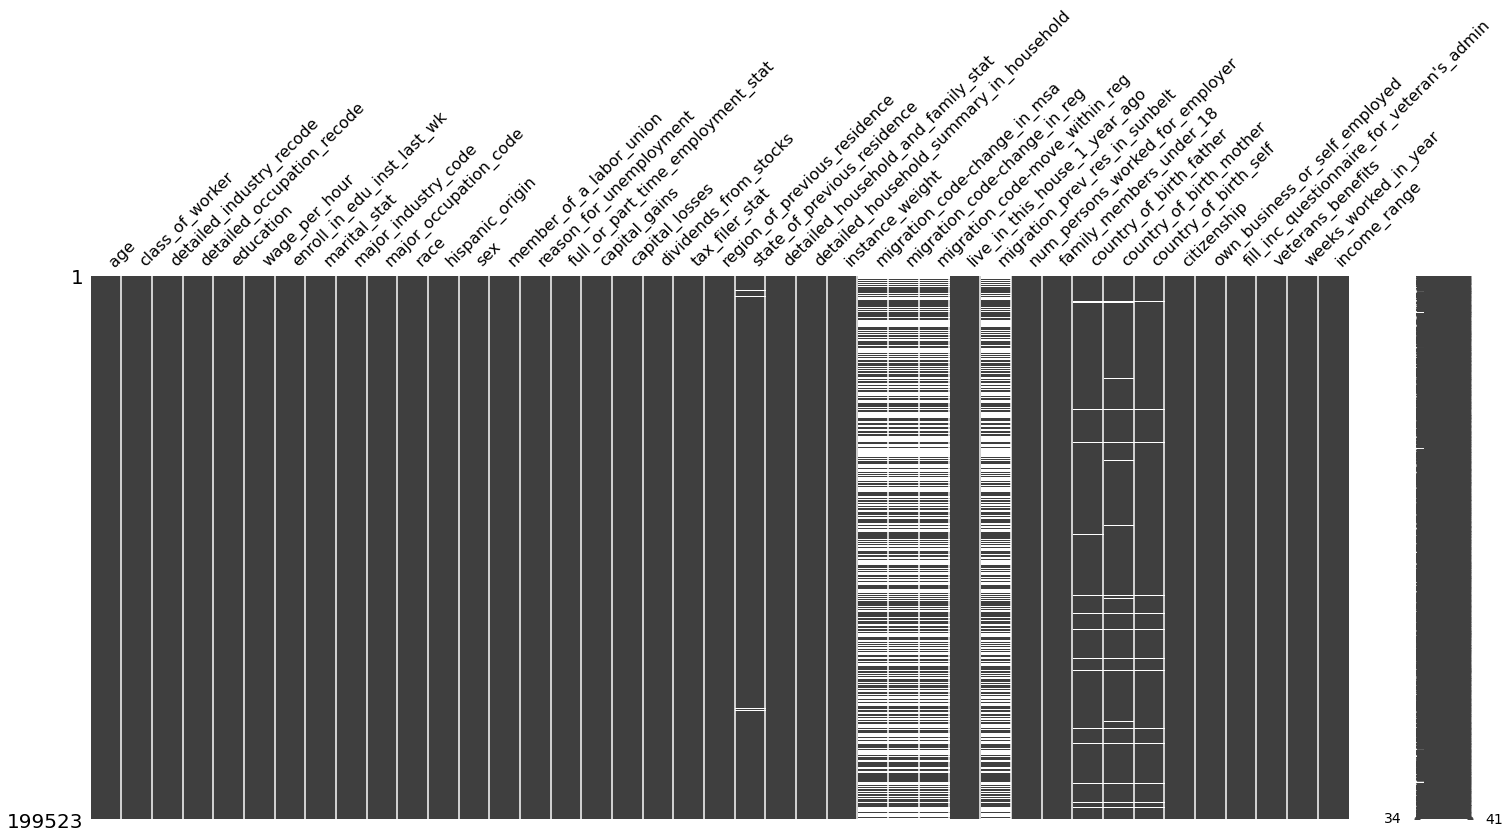

In [9]:
# plot missing values using the missingno package
msno.matrix(data_train)

# Descriptive Analysis

## Target analysis

In [21]:
# map values of income_range
mapping_income_dict = dict(
    zip(data_train["income_range"].value_counts().index.tolist(), ["under", "over"])
)
print(mapping_income_dict)
data_train["income_range"] = data_train["income_range"].map(mapping_income_dict)

{' - 50000.': 'under', ' 50000+.': 'over'}


In [22]:
# define <50k filter function
filter_under_50 = lambda x:x[x['income_range']=='under']
filter_over_50 = lambda x:x[x['income_range']=='over']

In [23]:
# tot number of person under 50k
under_50_pop_card = filter_under_50(data_train)["instance_weight"].sum()
over_50_pop_card = filter_over_50(data_train)["instance_weight"].sum()
print(
    f"Number of persons under 50k in the training set: {np.round(under_50_pop_card/ 10**6, 2)} M persons"
)
print(
    f"Number of persons under 50k in the training set: {np.round(over_50_pop_card/ 10**6, 2)} M persons"
)
print(
    f"People under 50k represent: {np.round((under_50_pop_card/data_train['instance_weight'].sum())*100, 2)} % of the training set population"
)


Number of persons under 50k in the training set: 325.0 M persons
Number of persons under 50k in the training set: 22.24 M persons
People under 50k represent: 93.59 % of the training set population


#### Target repartition : binary variable

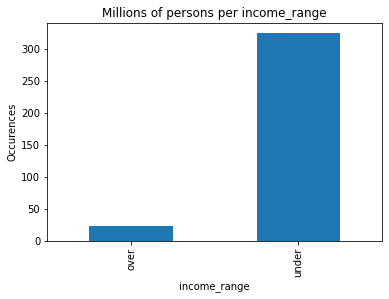

In [24]:
(data_train.groupby('income_range')['instance_weight'].sum()/ 10**6).plot(kind='bar',\
     title='Millions of persons per income_range',
     figsize=(6, 4),
     ylabel='Occurences')
plt.show()

The repartition between the 'over 50k/year income' and 'under 50k/year income' is very imbalanced
=> An imbalanced problem

## Univariate feature analysis

## Age

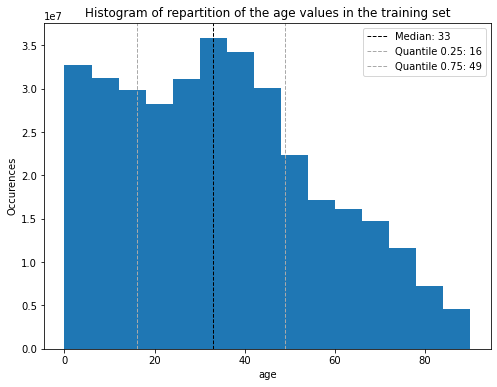

In [16]:
fig_age = plot_weigthed_histogram(data_train, 'age', bins=15, figsize=(8, 6))

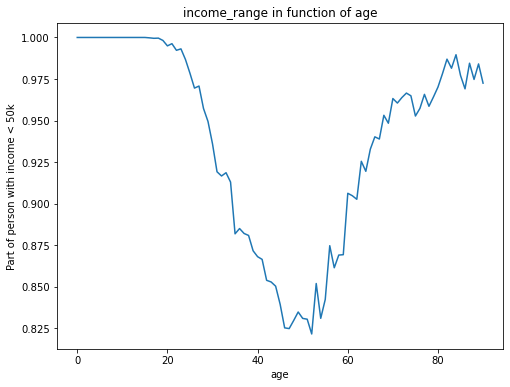

In [17]:
#### Age
under_fifty_prop_per_value(data_train, 'age').plot(figsize=(8, 6),
                                                   ylabel='Part of person with income < 50k',
                                                   title='income_range in function of age')
plt.show()

The part of persons with a < 50k/year income value is higher for under 25 and over 65 years old.

## Class of worker

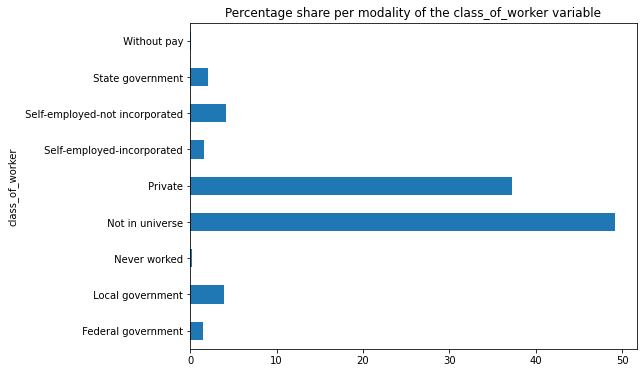

In [18]:
fig_worker_class = barplot_share_per_modality(data_train, 'class_of_worker', figsize=(8, 6))

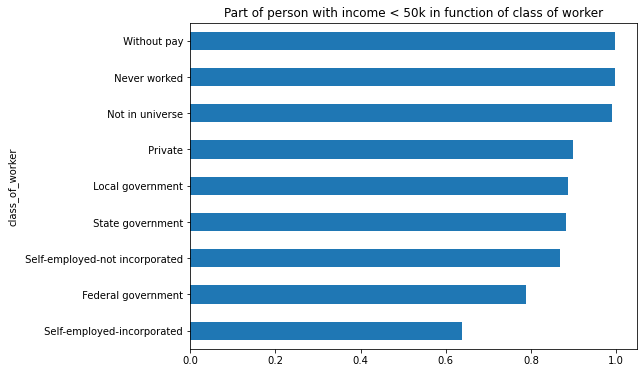

In [19]:
under_fifty_prop_per_value(data_train, 'class_of_worker').sort_values().plot(figsize=(8, 6), kind='barh',\
    title='Part of person with income < 50k in function of class of worker')
plt.show()

Government and self-employed persons are less likely to earn < 50k/year.

## Education

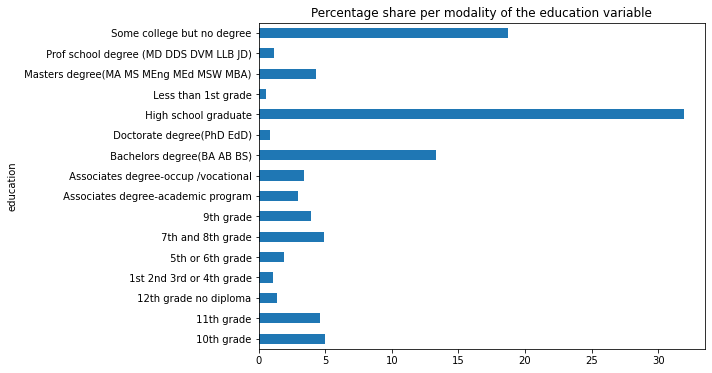

In [20]:
fig_education = barplot_share_per_modality(data_train[data_train['education']!=' Children'],
                                              'education', figsize=(8, 6))

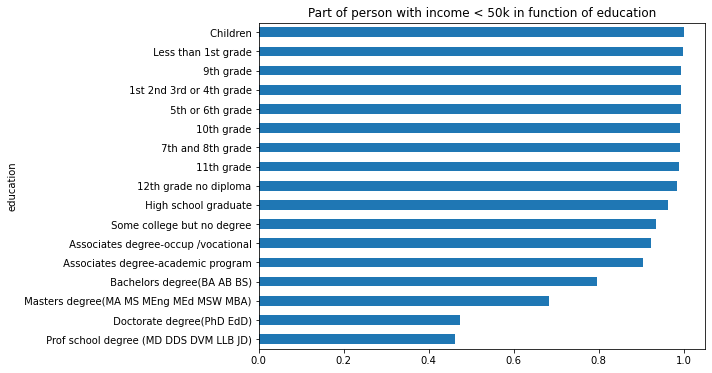

In [21]:
under_fifty_prop_per_value(data_train, 'education').sort_values().plot(figsize=(8, 6), kind='barh',\
    title='Part of person with income < 50k in function of education')
plt.show()

The part of persons earning < 50k significantly decreases with the level of education.

## Sex

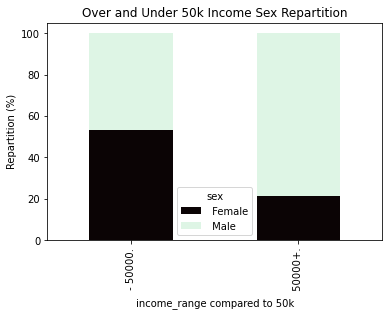

In [21]:
# Sex Repartition in under and over categories
repartition_under_over_per_category(data=data_train, column='sex').plot(kind='bar', stacked=True, figsize=(6, 4), 
                  xlabel='income_range compared to 50k', 
                  ylabel='Repartition (%)',
                  title='Over and Under 50k Income Sex Repartition',
                  cmap = "mako")
plt.show()

There are significantly more women than men in the <50k/year income class.

## Origin

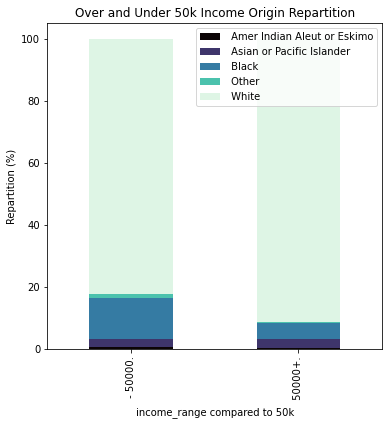

In [22]:
# Sex Repartition in under and over categories
repartition_under_over_per_category(data_train, 'race').plot(kind='bar', stacked=True, figsize=(6, 6), 
                  xlabel='income_range compared to 50k', 
                  ylabel='Repartition (%)',
                  title='Over and Under 50k Income Origin Repartition',
                  cmap = 'mako')
plt.legend(loc=1)
plt.show()

Black person are more represented in the <50k income class.

## Wage per hour

In [35]:
print('Quantile wage per hour: ', get_quantile_val(data_train, column='wage_per_hour'))

Quantile wage per hour:  p
0.25    0.0
0.50    0.0
0.75    0.0
dtype: float64


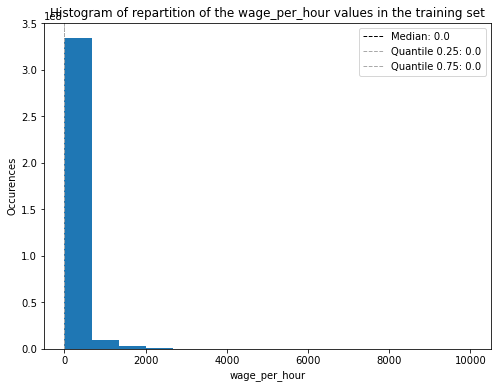

In [13]:
fig_wage_per_hour = plot_weigthed_histogram(data_train, 'wage_per_hour', bins=15, figsize=(8, 6))

There are many unexplained zero in this variable. The feature might be ignored for the modeling part.